In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.2.0
2.3.0-tf


In [17]:
import os
import numpy as np
import pandas as pd 
import math 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [14]:
def get_roc_curve(model, X, y):
    pred_proba = np.argmax(model.predict(X), axis=-1)
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

def draw_roc(roc):
    fpr, tpr = roc
    plt.figure()
    plt.plot(fpr, tpr, color="red")
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')
    plt.show()
    
def load_slices(file):
    return np.load(images_path+file+".npy")    

# 3D Data

In [5]:
labels_path = 'labels.csv'
images_path = '../completed/'
IMG_SIZE = 64
IMG_DEPTH = 32

In [9]:
candidates = pd.read_csv(labels_path,index_col=0)


slicesData = []
slicesLabel = []
for index, candidat in candidates.iterrows():
    slices = load_slices(candidat.seriesuid)
    label = []
    if candidat.label == 1:
        label = [1,0]
    else:
        label = [0,1]
        
    slicesData.append(slices.reshape([32,64,64,1]))
    slicesLabel.append(label)

slicesData = np.asarray(slicesData)
slicesLabel = np.asarray(slicesLabel)

In [10]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(slicesData,slicesLabel,train_size=0.8,random_state=2137)
print(np.sum(Ytrain,axis=0))
print(np.sum(Ytest,axis=0))

[480 230]
[120  58]


In [12]:
modelCNN = keras.models.load_model('./CNN_Model_3D')

In [18]:
roc_cnn_3d = get_roc_curve(modelCNN, Xtest, Ytest[:,1])

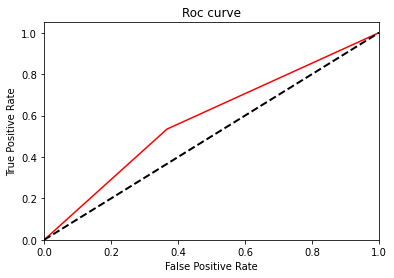

In [19]:
draw_roc(roc_cnn_3d)